In [1]:
import matplotlib.pyplot as plt

import numpy as np
import os
from ctd.comparison.analysis.tt.tt import Analysis_TT 
from ctd.comparison.analysis.dt.dt import Analysis_DT
# Import pca
import dotenv
from ctd.comparison.comparison import Comparison

dotenv.load_dotenv(dotenv.find_dotenv())

True

In [2]:

HOME_DIR = os.environ['HOME_DIR']
print(HOME_DIR)

pathTT = HOME_DIR + 'content/trained_models/task-trained/20240418_NBFF_NoisyGRU_Final4/max_epochs=500 latent_size=64 seed=0/'
an_TT = Analysis_TT(run_name = "TT", filepath = pathTT)


path_GRU_Sweep = pathTT + "20240419_Fig1_NBFF_GRU_Sweep/"
subfolders_GRU = [f.path for f in os.scandir(path_GRU_Sweep) if f.is_dir()]

path_Vanilla_Sweep = pathTT + "20240419_Fig1_NBFF_Vanilla_Sweep2/"
subfolders_Vanilla = [f.path for f in os.scandir(path_Vanilla_Sweep) if f.is_dir()]

path_NODE_Sweep = pathTT + "20240424_Fig1_NBFF_NODE/"
subfolders_NODE = [f.path for f in os.scandir(path_NODE_Sweep) if f.is_dir()]

path_LFADS_Sweep = pathTT + "20240422_Fig1_NBFF_LFADS_Sweep/"
subfolders_LFADS = [f.path for f in os.scandir(path_LFADS_Sweep) if f.is_dir()]

/home/csverst/Github/CtDBenchmark/


In [3]:
comparison = Comparison(comparison_tag="Figure1NBFF")
comparison.load_analysis(an_TT, reference_analysis=True, group = "TT")

for subfolder in subfolders_GRU:
    subfolder = subfolder + "/"
    analysis_temp = Analysis_DT(run_name = "GRU", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_temp, group = "GRU")

for subfolder in subfolders_Vanilla:
    subfolder = subfolder + "/"
    analysis_temp = Analysis_DT(run_name = "Vanilla", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_temp, group = "Vanilla")

for subfolder in subfolders_NODE:
    subfolder = subfolder + "/"
    analysis_temp = Analysis_DT(run_name = "NODE", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_temp, group = "NODE")

for subfolder in subfolders_LFADS:     
    subfolder = subfolder + "/"
    analysis_temp = Analysis_DT(run_name = "LFADS", filepath = subfolder, model_type = "LFADS")
    comparison.load_analysis(analysis_temp, group = "LFADS")

comparison.regroup()

Working on 1 of 21: GRU
Group: GRU
Rate R2: 0.9201291507727477
State R2: 0.9728583022871792
Working on 2 of 21: GRU
Group: GRU
Rate R2: 0.9363152576396433
State R2: 0.9756391260110044
Working on 3 of 21: GRU
Group: GRU
Rate R2: 0.9231471814025801
State R2: 0.9746151110298028
Working on 4 of 21: GRU
Group: GRU
Rate R2: 0.9233417383840516
State R2: 0.9752291947797395
Working on 5 of 21: GRU
Group: GRU
Rate R2: 0.933491289102211
State R2: 0.9769642525473259
Working on 6 of 21: LFADS
Group: LFADS
Rate R2: 0.884739249896979
State R2: 0.9293906705927151
Working on 7 of 21: LFADS
Group: LFADS
Rate R2: 0.8961408072992404
State R2: 0.9320674252581425
Working on 8 of 21: LFADS
Group: LFADS
Rate R2: 0.8863900519482985
State R2: 0.9254638784972311
Working on 9 of 21: LFADS
Group: LFADS
Rate R2: 0.8886777621854924
State R2: 0.9295363206094809
Working on 10 of 21: LFADS
Group: LFADS
Rate R2: 0.8972921830703148
State R2: 0.9349871502405568
Working on 11 of 21: NODE
Group: NODE
Rate R2: 0.897572555351

array([[0.92012915, 0.9728583 ],
       [0.93631526, 0.97563913],
       [0.92314718, 0.97461511],
       [0.92334174, 0.97522919],
       [0.93349129, 0.97696425],
       [0.88473925, 0.92939067],
       [0.89614081, 0.93206743],
       [0.88639005, 0.92546388],
       [0.88867776, 0.92953632],
       [0.89729218, 0.93498715],
       [0.89757256, 0.91931799],
       [0.89182413, 0.91903772],
       [0.88763417, 0.91428893],
       [0.89231765, 0.91541871],
       [0.88285263, 0.90852668],
       [0.        , 0.        ],
       [0.89824893, 0.943256  ],
       [0.89128221, 0.9405453 ],
       [0.88818434, 0.93450851],
       [0.90169789, 0.94279976],
       [0.88236233, 0.93476252]])

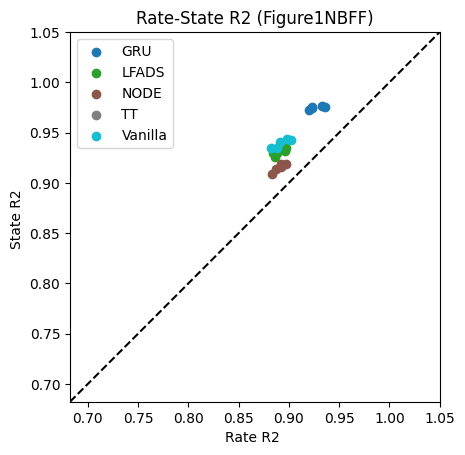

In [4]:
comparison.compare_state_rate_r2(save_pdf=True)

(100000, 50)
(100000, 50)
[0.97557774 0.97491875 0.95679807 0.95839226 0.97144806 0.93274989
 0.97755192 0.95119621 0.9687754  0.94577432 0.8502518  0.95415528
 0.93954745 0.97348493 0.97313383 0.97123273 0.93780167 0.93431812
 0.97140493 0.90786079 0.94284065 0.98058698 0.96805989 0.91774177
 0.94960109 0.86633482 0.94182681 0.81232775 0.94616487 0.84405917
 0.93819443 0.94409283 0.94181643 0.94865676 0.71771999 0.9758101
 0.96890377 0.984704   0.93740476 0.80543207 0.95156828 0.95198613
 0.94569961 0.96975124 0.89058721 0.85196481 0.97988264 0.98504856
 0.96441918 0.9174583 ]


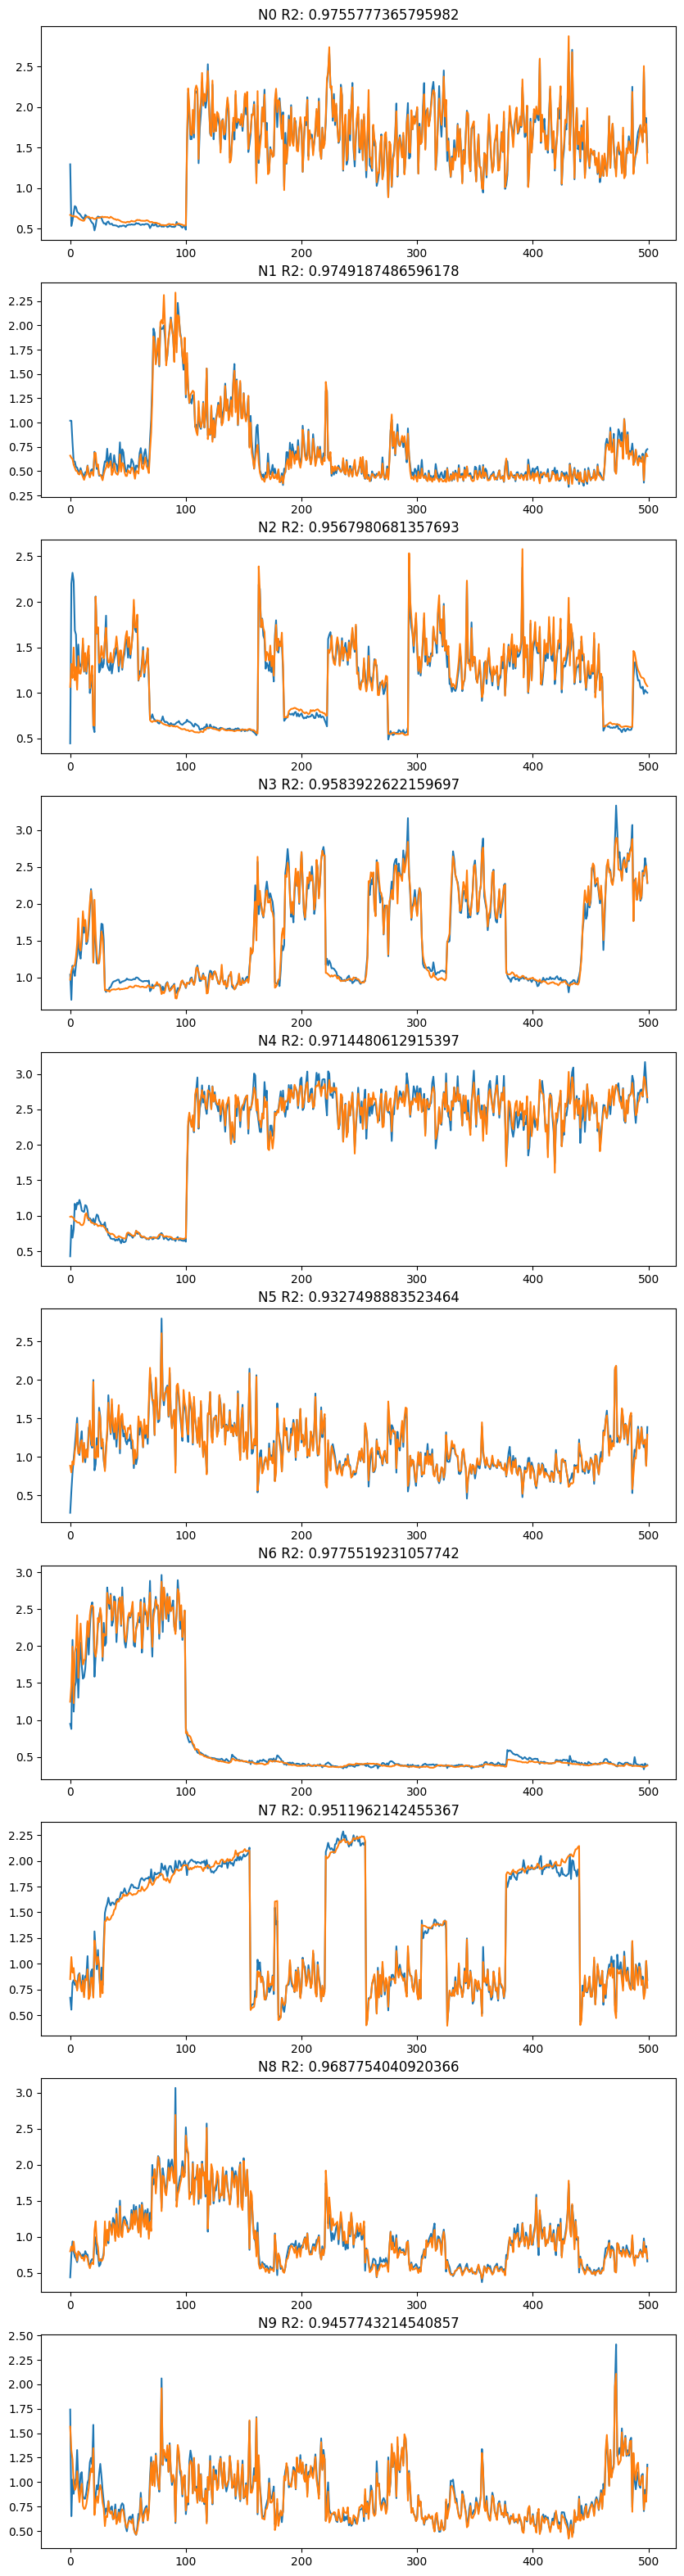

In [5]:
# sims = comparison.compare_dynamics_DSA()

import torch
phase= "val"

rates, latents = comparison.analyses[1].get_model_outputs(phase=phase)
true_rates = comparison.analyses[1].get_true_rates(phase=phase)

from sklearn.metrics import r2_score
tr_np = true_rates.detach().cpu().numpy()
rates_np = rates.detach().cpu().numpy()
tr_np = tr_np.reshape(-1, tr_np.shape[-1])
rates_np = rates_np.reshape(-1, rates_np.shape[-1])
print(tr_np.shape)
print(rates_np.shape)
r2 = r2_score(tr_np, rates_np, multioutput='raw_values')
print(r2)

trial_num= 1
rates_0 = rates[trial_num,:,:].detach().numpy()
latents_0 = latents[trial_num,:,:].detach().numpy()
true_rate_0 = true_rates[trial_num,:,:].detach().numpy()

neurons_to_plot= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
fig = plt.figure(figsize=( 10,4*len(neurons_to_plot),))
axes = fig.subplots(len(neurons_to_plot))
for i, ax in enumerate(axes):
    ax.plot(rates_0[:, neurons_to_plot[i]], label="Reconstructed")
    ax.plot(true_rate_0[:, neurons_to_plot[i]], label="True")
    ax.set_title(f"N{neurons_to_plot[i]} R2: {r2[neurons_to_plot[i]]}")

In [6]:
# Take upper triangle of sims
# sims = np.triu(sims, k=0)
# sims = sims.flatten()
# self_sim = sims[0]
# sims = sims[1:]
# fig = plt.figure()
# plt.bar(range(len(sims)), sims)
# plt.title("Dynamical Similarity")
# plt.xlabel("Model")
# plt.ylabel("Similarity")
# plt.xticks(range(len(sims)), ["GRU", "Vanilla", "NODE"])    

comparison.compare_to_reference_affine